In [1]:
import numpy as np
import pandas as pd
import scripts as sc
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

prefix = 'r'

pd.set_option('display.max_rows', 500)
idxFigure = 1

## Abertura dos arquivos

In [2]:
dataAnswers = pd.read_csv('data/{}/Answers.csv'.format(prefix), encoding='latin-1')
dataQuestions = pd.read_csv('data/{}/Questions.csv'.format(prefix), encoding='latin-1')
dataTags = pd.read_csv('data/{}/Tags.csv'.format(prefix))

len(dataAnswers), len(dataQuestions), len(dataTags)

(250788, 189930, 319375)

## Remover todos os valores nulos do conjunto de dados

In [3]:
dataAnswers = dataAnswers.dropna()
dataQuestions = dataQuestions.dropna()
dataTags = dataTags.dropna()

len(dataAnswers), len(dataQuestions), len(dataTags)

(250000, 188729, 319212)

## Informações sobre os conjuntos de dados

In [4]:
dataAnswers.info(), dataQuestions.info(), dataTags.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250000 entries, 0 to 250787
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                250000 non-null  int64  
 1   OwnerUserId       250000 non-null  float64
 2   CreationDate      250000 non-null  object 
 3   ParentId          250000 non-null  int64  
 4   Score             250000 non-null  int64  
 5   IsAcceptedAnswer  250000 non-null  bool   
 6   Body              250000 non-null  object 
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 13.6+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 188729 entries, 0 to 189929
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Id            188729 non-null  int64  
 1   OwnerUserId   188729 non-null  float64
 2   CreationDate  188729 non-null  object 
 3   Score         188729 non-null  int64  
 4   Title  

(None, None, None)

## Adição das colunas: ano, mes e dia

In [5]:
dateQuestion = sc.getDateFormat(dataQuestions['CreationDate'].values)
dateAnswer = sc.getDateFormat(dataAnswers['CreationDate'].values)

dataQuestions['ano'] = dateQuestion[0][0][0]
dataQuestions['mes'] = dateQuestion[0][0][1]
dataQuestions['dia'] = dateQuestion[0][0][2]

dataAnswers['ano'] = dateAnswer[0][0][0]
dataAnswers['mes'] = dateAnswer[0][0][1]
dataAnswers['dia'] = dateAnswer[0][0][2]

## Tamanho dos conjuntos por ano

In [6]:
print('\t\tQuestões:\t\tPerguntas:')
for ano in range(2008, 2016+1):
    print('ano: {}\ttamanho: {}\t\ttamanho: {}'.format(ano, len(dataQuestions.loc[(dataQuestions['ano'] == ano)]), len(dataAnswers.loc[(dataAnswers['ano'] == ano)])))

		Questões:		Perguntas:
ano: 2008	tamanho: 4		tamanho: 12
ano: 2009	tamanho: 455		tamanho: 1145
ano: 2010	tamanho: 2178		tamanho: 4541
ano: 2011	tamanho: 5604		tamanho: 10665
ano: 2012	tamanho: 11541		tamanho: 18173
ano: 2013	tamanho: 20651		tamanho: 30652
ano: 2014	tamanho: 29218		tamanho: 40050
ano: 2015	tamanho: 38388		tamanho: 49155
ano: 2016	tamanho: 42019		tamanho: 51928


## Total de questões para cada ano

In [7]:
dataQuestions['ano'].value_counts()

2016    42019
2017    38671
2015    38388
2014    29218
2013    20651
2012    11541
2011     5604
2010     2178
2009      455
2008        4
Name: ano, dtype: int64

## Estamos considerando que um usuário não novato (usuario veterano), os usuários do ano de 2008 e 2009, já que no ano de 2008 há apenas 4 questões.

In [8]:
veterans = dataQuestions.loc[(dataQuestions['ano'] == 2008) | (dataQuestions['ano'] == 2009) | (dataQuestions['ano'] == 2010), 'OwnerUserId'].unique().tolist()

len(veterans)

847

## Total de novatos nos anos

In [9]:
dataQuestions['Body'] = dataQuestions['Body'].str.lower()

In [10]:
data = []
repeatNewer = []
libTerms = [
    ['dplyr'], 
    ['ggplot2'], 
    ['data.table'],
    ['tidyr'],
    ['knitr'],
    ['dt'],
    ['lubridate'],
    ['mlr'],
    ['lattice'],
    ['jsonlite'],
    ['slidify'],
    ['swirl'],
    ['CircStats'],
    ['DBI'],
    ['odbc'],
    ['RMySQL'],
    ['RSQLite'],
    ['RPostgresSQL'],
    ['XLConnect'],
    ['xlsx'],
    ['foreign'],
    ['haven']
]

for libs in libTerms:
    dataTopic = []
    newers = {}
    
    for lib in libs:
        dataQuestions['lib'] = dataQuestions['Body'].map(lambda val: val.count(lib)>0)
        
        if len(dataTopic) > 1:
            dataTopic.loc[dataTopic['lib'] == False, 'lib'] = dataQuestions.loc[dataQuestions['lib'] == True]
        else:
            dataTopic = dataQuestions.loc[dataQuestions['lib'] == True]

    for ano in range(min(dataQuestions['ano'])+1, max(dataQuestions['ano'])+1):
        dataAno = dataTopic.loc[dataTopic['ano'] == ano]

        if len(dataAno) < 1:

            for mes in range(1, 13):
                data.append([prefix, libs[0], ano, mes, 0])
        
        else:

            for mes in range(min(dataQuestions['mes']), max(dataQuestions['mes'])+1):
                dataMes = dataAno.loc[dataAno['mes'] == mes]
                qtdNewComers = 0

                if len(dataMes) < 1:
                    data.append([prefix, libs[0], ano, mes, qtdNewComers])
                
                else:
                    for question in dataMes.values:
                        
                        if question[1] not in veterans:
                            qtdNewComers += 1

                            if question[1] not in newers:
                                newers[question[1]] = 1
                            else:
                                newers[question[1]] += 1
                        
                    data.append([prefix, libs[0], ano, mes, qtdNewComers])

    for newer in newers:
        repeatNewer.append([prefix, libs[0], newer, newers[newer]])

dataLanguage = pd.DataFrame(data, columns=['Language', 'Lib', 'Year', 'Month', 'NewCommers'])
dataNewerRepeat = pd.DataFrame(repeatNewer, columns=['Language', 'Lib', 'Newer', 'Repeat'])

In [11]:
resultRepeat = []
resultNewers = []
labelRepeat = []

for term in libTerms:
    print('Lib', term[0])
    qtdTotal = dataLanguage.loc[dataLanguage['Lib'] == term[0], 'NewCommers'].sum()

    if qtdTotal >= 1:
        # print('\tQtd total de novatos: ', qtdTotal)
        # print('\tQtd max de novatos em um mês: ', max(dataLanguage.loc[dataLanguage['Lib'] == term[0], 'NewCommers']))
        # print('\tMaior qtd de perguntas feitas por um novato: ', max(dataNewerRepeat.loc[dataNewerRepeat['Lib'] == term[0], 'Repeat']), '\n')
    
        resultRepeat.append(max(dataNewerRepeat.loc[dataNewerRepeat['Lib'] == term[0], 'Repeat']))
        resultNewers.append(dataLanguage.loc[dataLanguage['Lib'] == term[0], 'NewCommers'].sum())
        labelRepeat.append(term[0])
    else:
        print('Qtd menor que 0')

Lib dplyr
Lib ggplot2
Lib data.table
Lib tidyr
Lib knitr
Lib dt
Lib lubridate
Lib mlr
Lib lattice
Lib jsonlite
Lib slidify
Lib swirl
Lib CircStats
Qtd menor que 0
Lib DBI
Qtd menor que 0
Lib odbc
Lib RMySQL
Qtd menor que 0
Lib RSQLite
Qtd menor que 0
Lib RPostgresSQL
Qtd menor que 0
Lib XLConnect
Qtd menor que 0
Lib xlsx
Lib foreign
Lib haven


In [12]:
a = []
for idx in range(len(labelRepeat)):
    a.append([labelRepeat[idx], resultRepeat[idx], resultNewers[idx]])

dataResult = pd.DataFrame(a, columns=['lib', 'qtd_max_ptgn', 'qtd_max_newers'])

dataResult

,lib,qtd_max_ptgn,qtd_max_newers
0,dplyr,46,7323
1,ggplot2,72,12153
2,data.table,61,7339
3,tidyr,21,1070
4,knitr,32,2592
5,dt,65,18196
6,lubridate,13,1212
7,mlr,10,337
8,lattice,16,1827
9,jsonlite,8,765


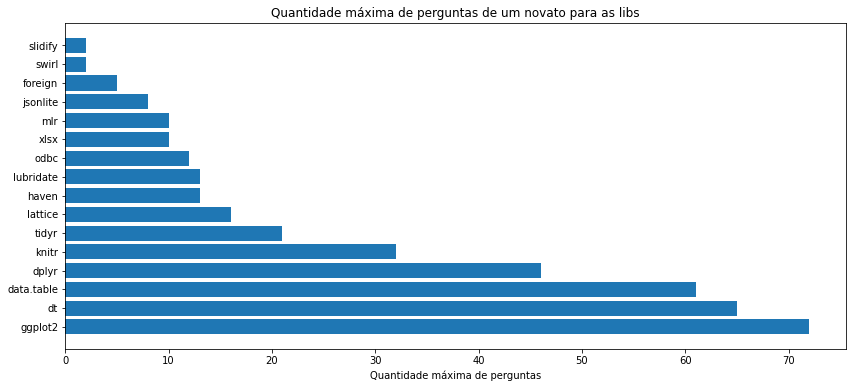

In [13]:
idxFigure = 1 
dataResult = dataResult.sort_values(by=['qtd_max_ptgn'])

fig, ax = plt.subplots()

fig.set_size_inches(14, 6)
fig.savefig('./result/{}/{}. qtd_max.png'.format(prefix, idxFigure), dpi=100)

y_pos = np.arange(len(labelRepeat))

ax.barh(y_pos, dataResult['qtd_max_ptgn'].values.tolist(), align='center')
ax.set_yticks(y_pos, labels=dataResult['lib'].values.tolist())
ax.invert_yaxis()
ax.set_title('Quantidade máxima de perguntas de um novato para as libs')
ax.set_xlabel('Quantidade máxima de perguntas')

plt.show()
idxFigure+=1

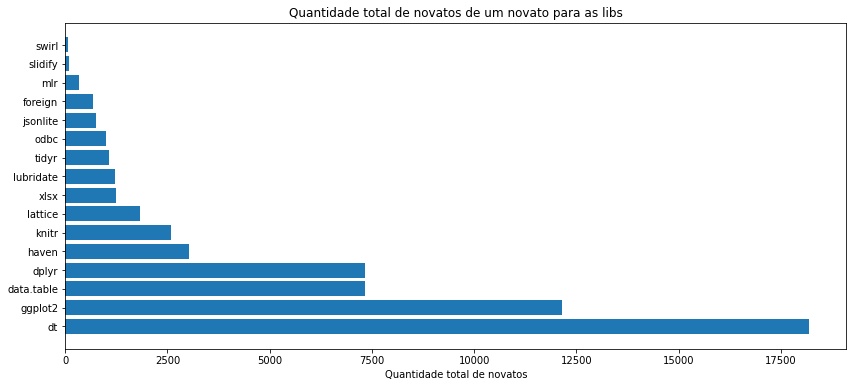

In [14]:
idxFigure = 2
dataResult = dataResult.sort_values(by=['qtd_max_newers'])

fig, ax = plt.subplots()

fig.set_size_inches(14, 6)
fig.savefig('./result/{}/{}. qtd_total.png'.format(prefix, idxFigure), dpi=100)

y_pos = np.arange(len(labelRepeat))

ax.barh(y_pos, dataResult['qtd_max_newers'].values.tolist(), align='center')
ax.set_yticks(y_pos, labels=dataResult['lib'].values.tolist())
ax.invert_yaxis()
ax.set_title('Quantidade total de novatos de um novato para as libs')
ax.set_xlabel('Quantidade total de novatos')

plt.show()
idxFigure+=1

LIB:  dplyr


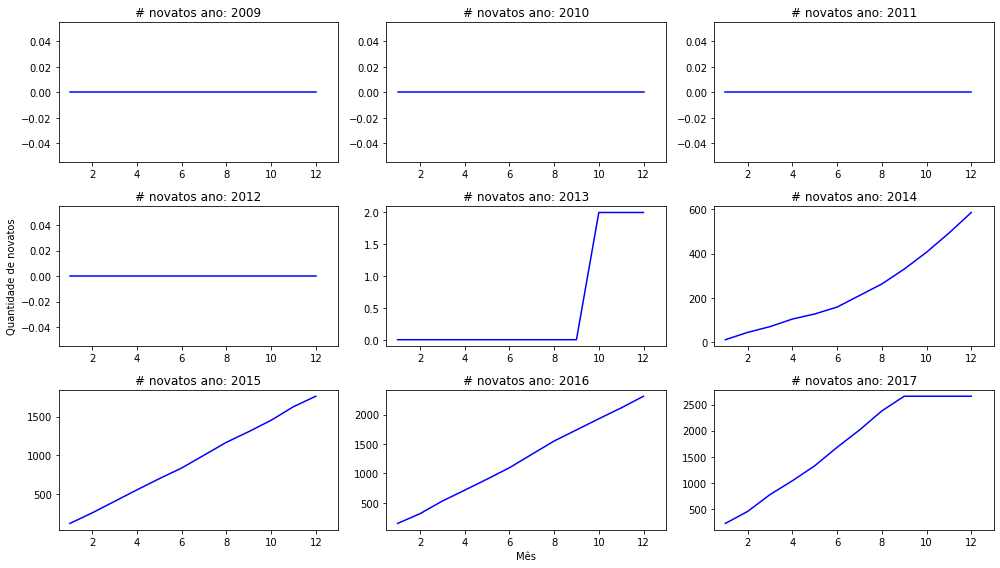

LIB:  ggplot2


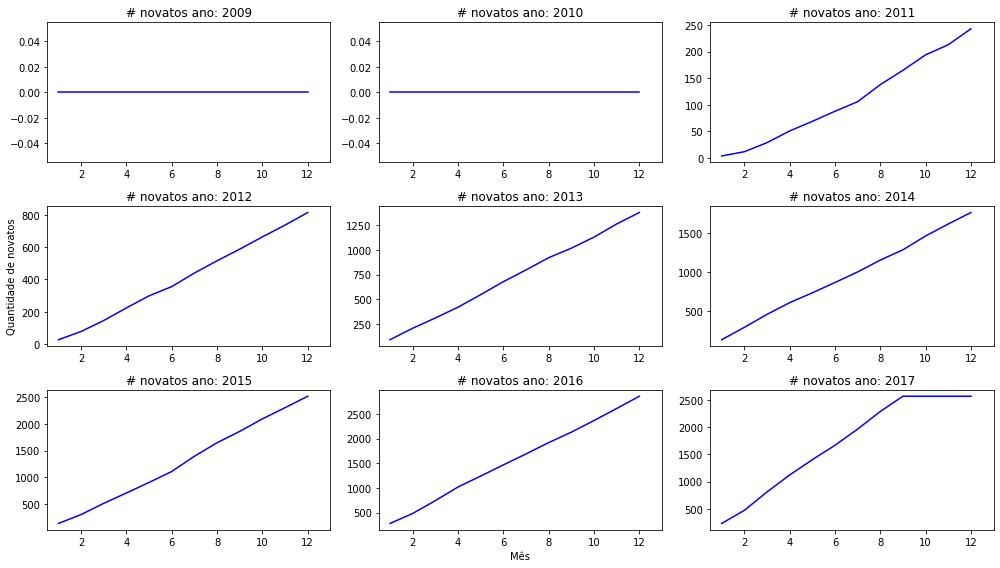

LIB:  data.table


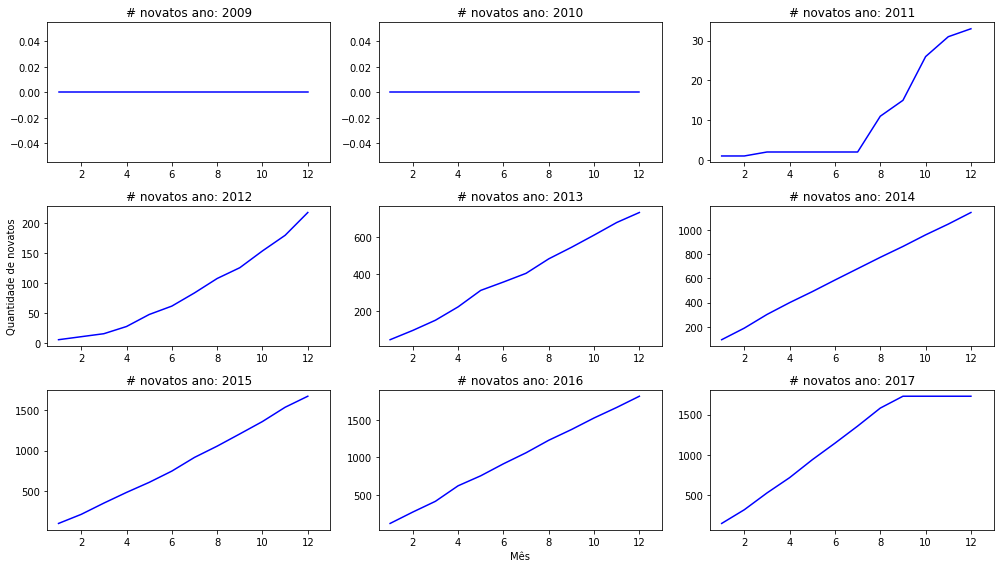

LIB:  tidyr


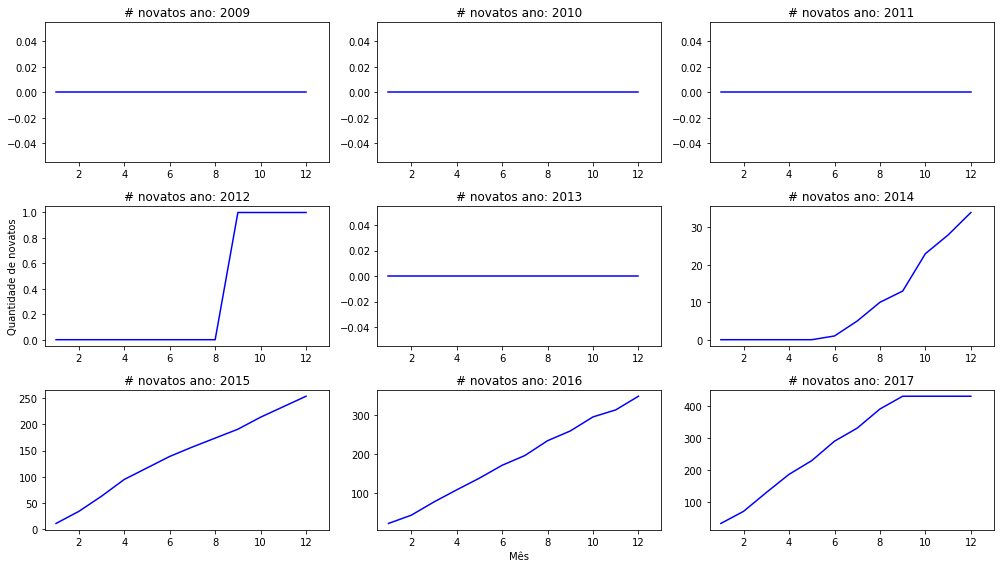

LIB:  knitr


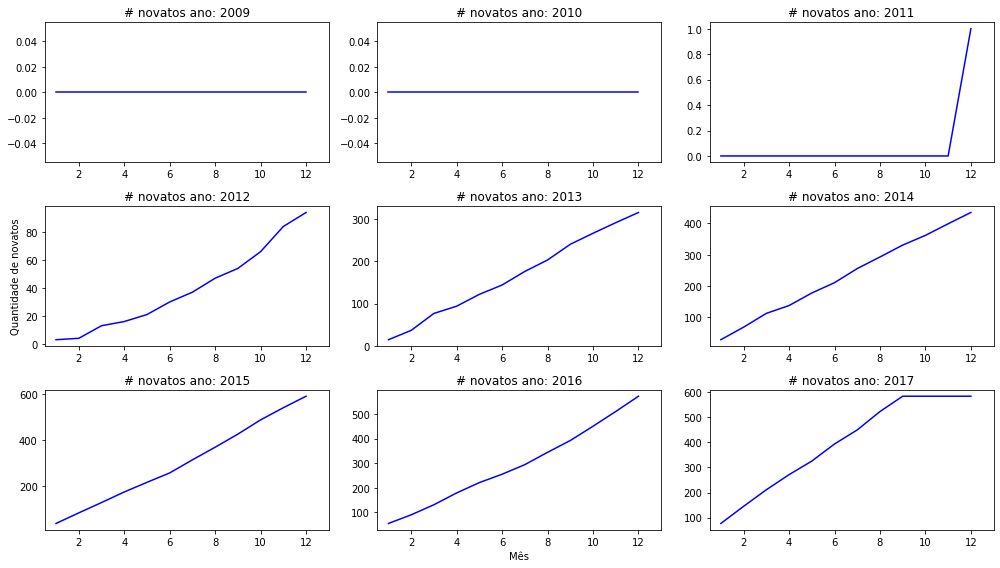

LIB:  dt


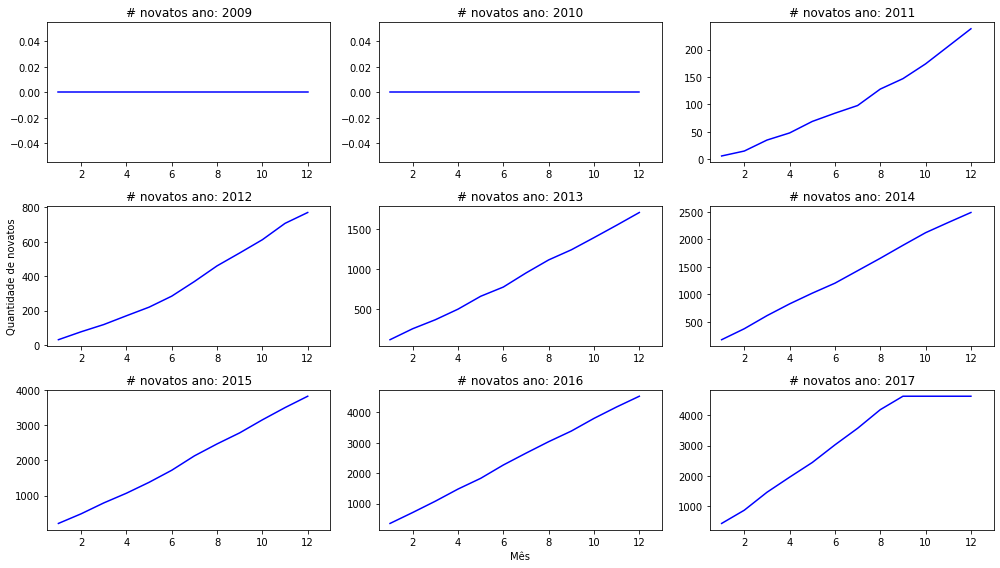

LIB:  lubridate


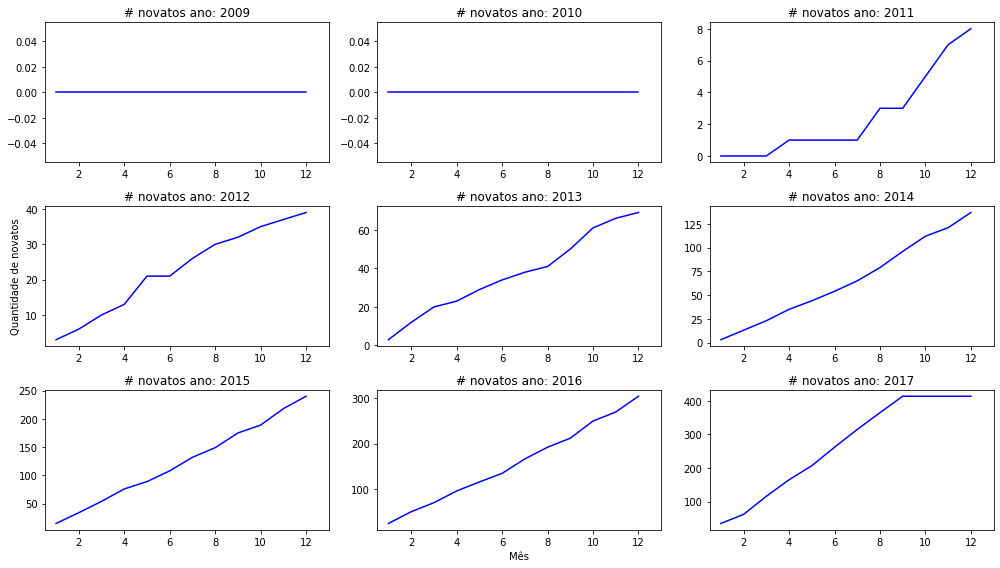

LIB:  mlr


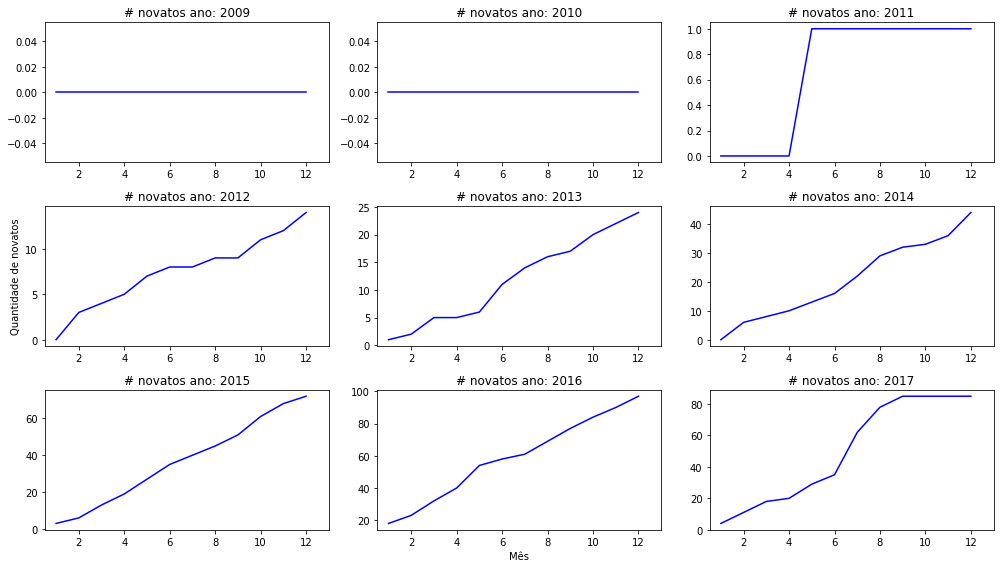

LIB:  lattice


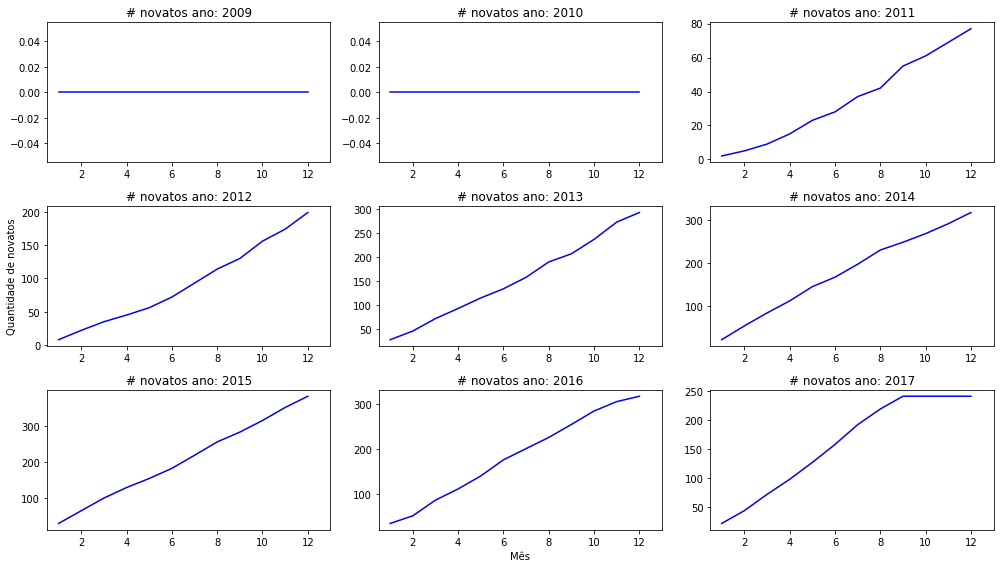

LIB:  jsonlite


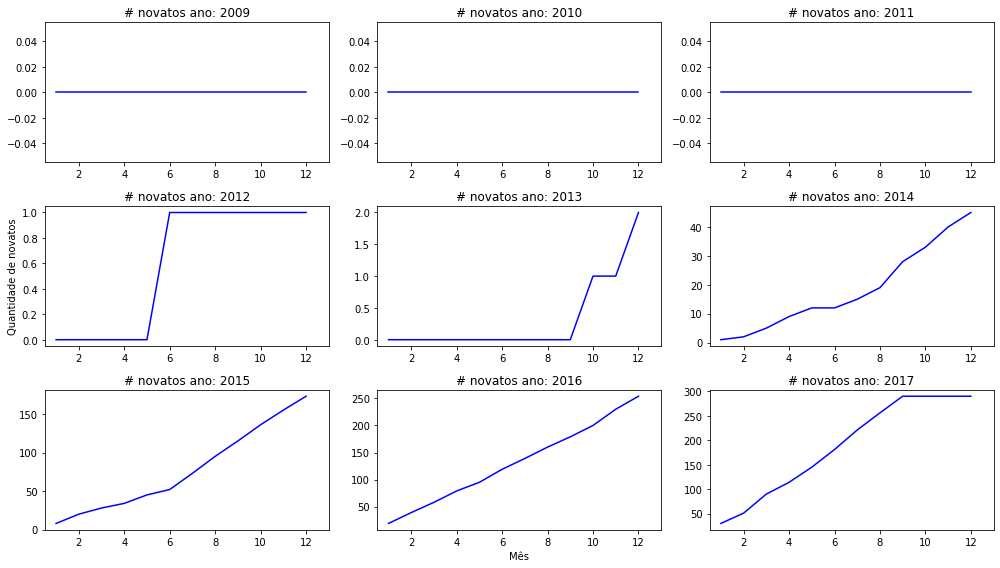

LIB:  slidify


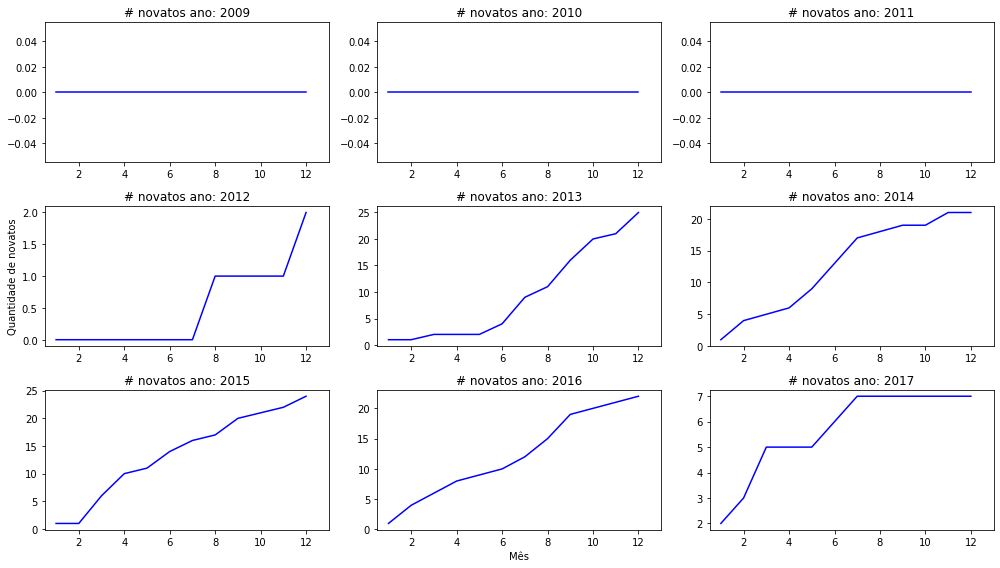

LIB:  swirl


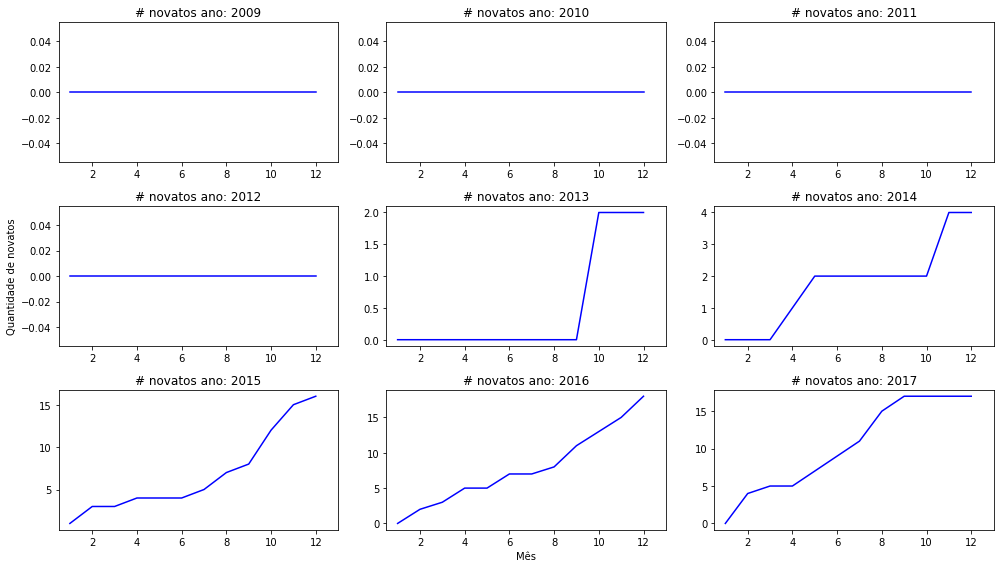

LIB:  CircStats


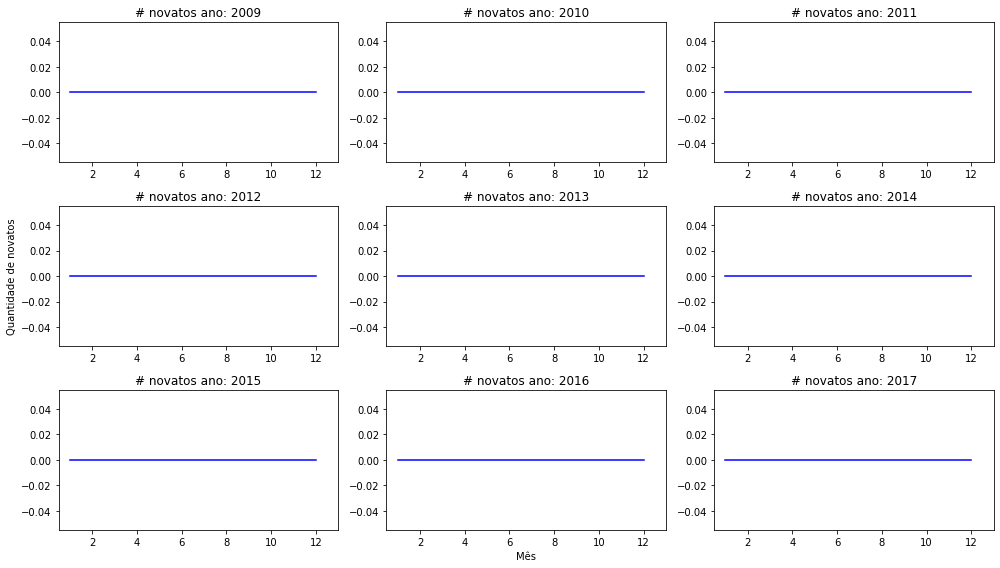

LIB:  DBI


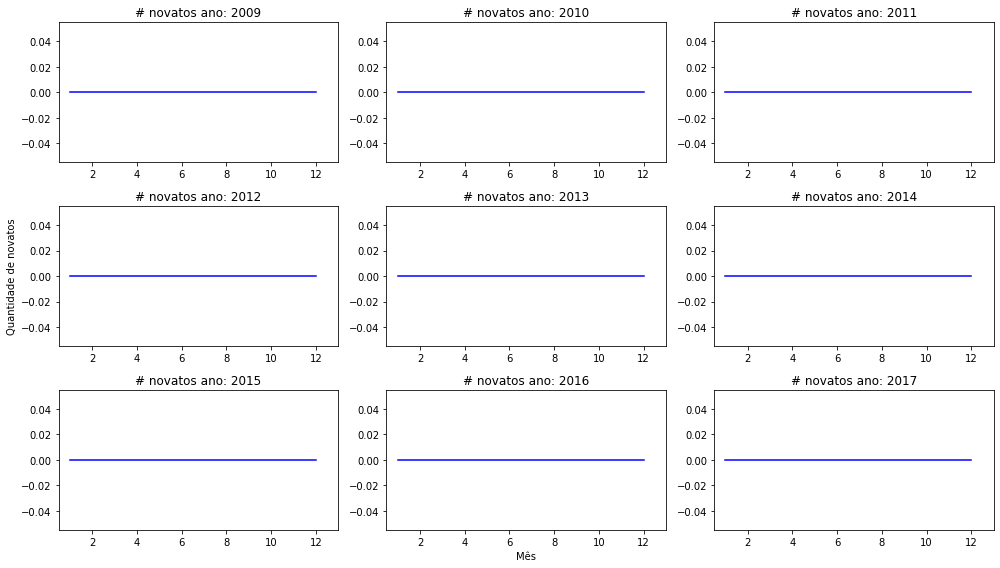

LIB:  odbc


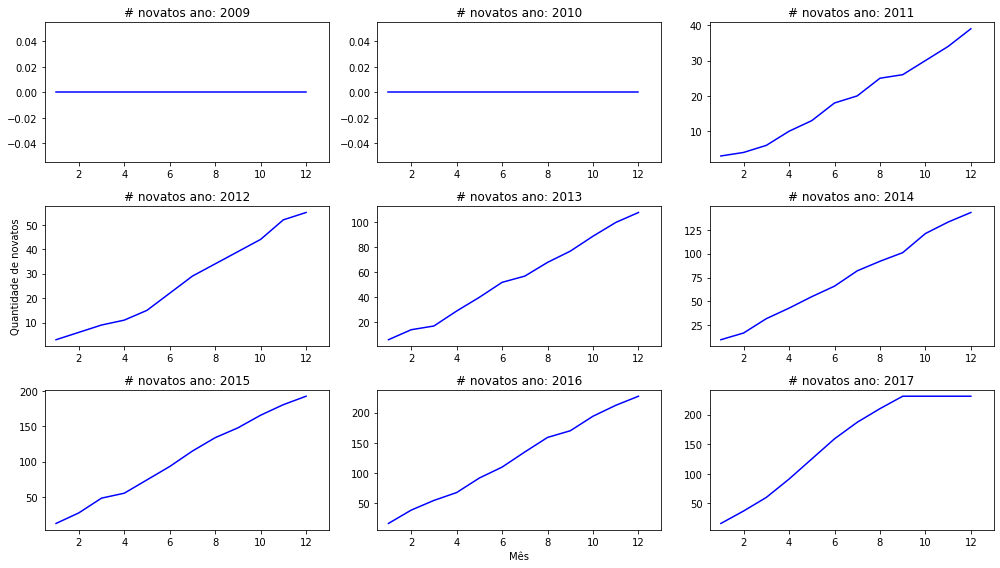

LIB:  RMySQL


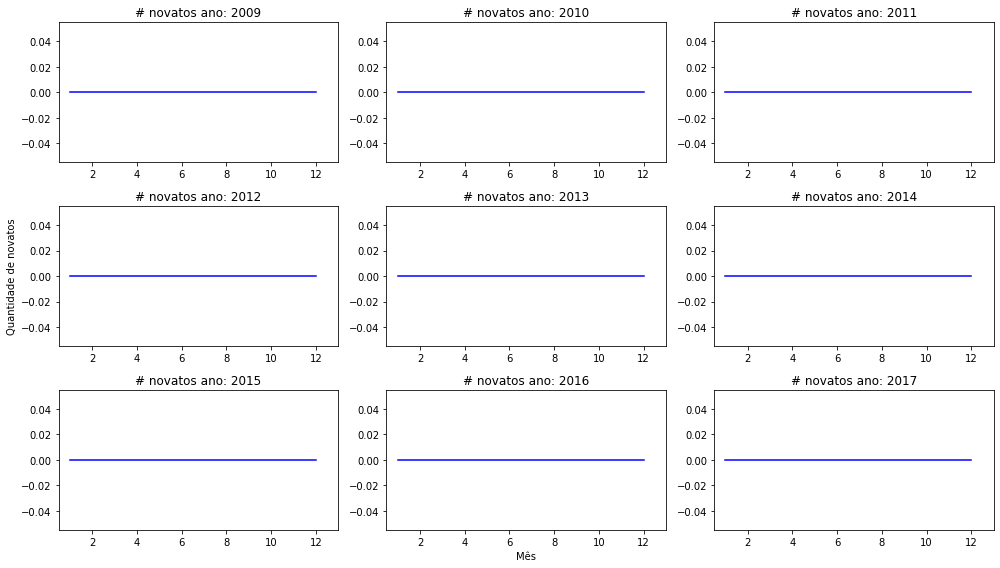

LIB:  RSQLite


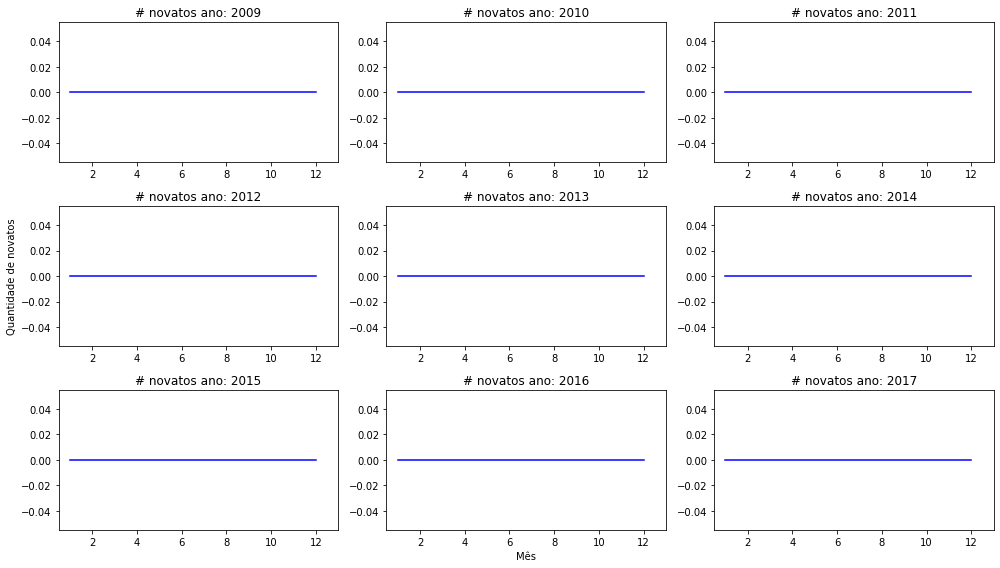

LIB:  RPostgresSQL


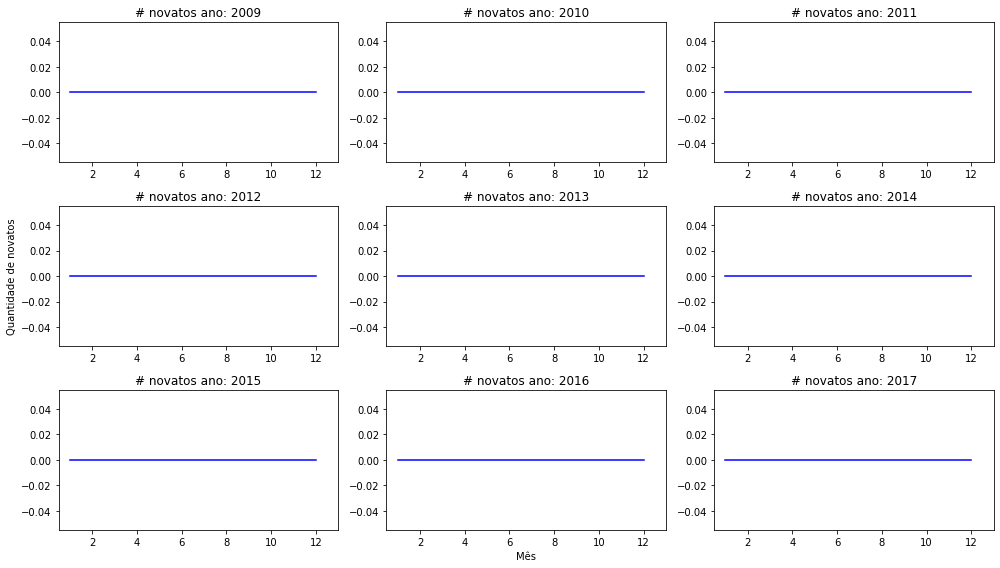

LIB:  XLConnect


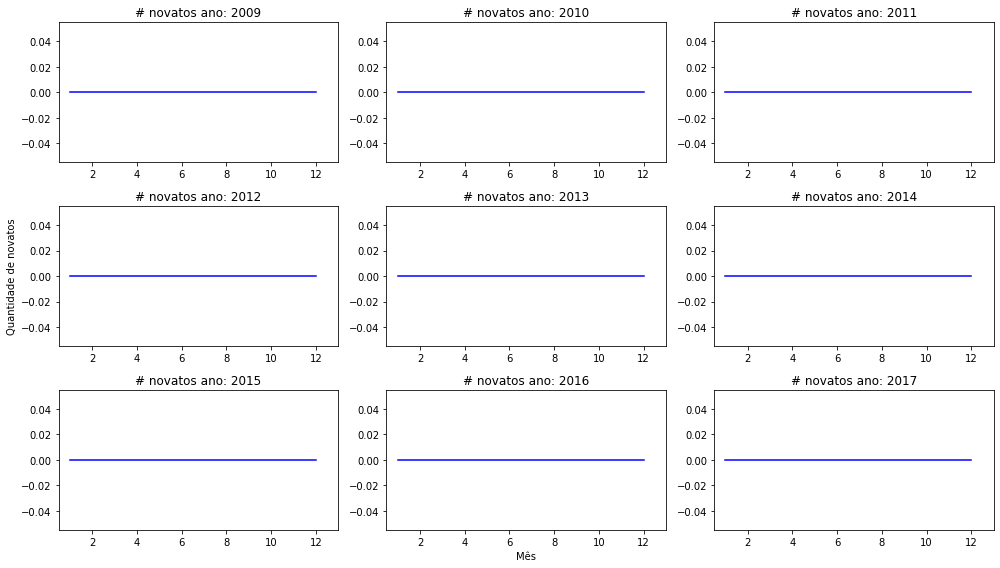

LIB:  xlsx


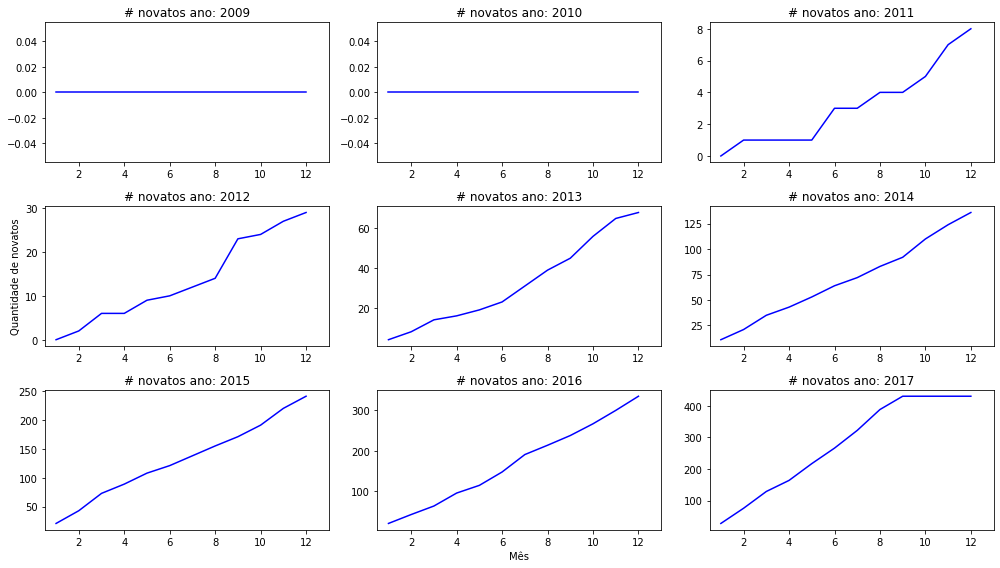

LIB:  foreign


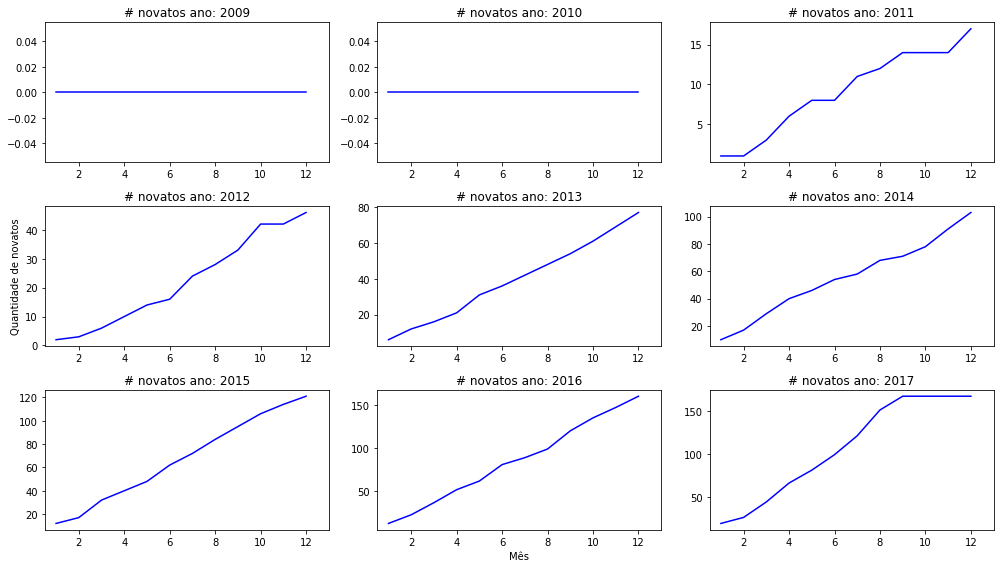

LIB:  haven


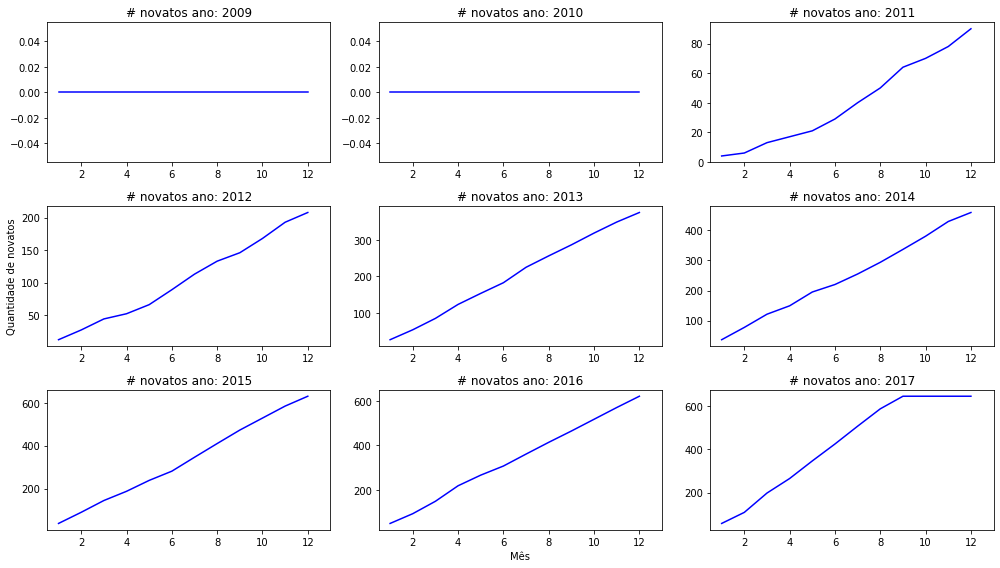

In [17]:
idxFigure = 3
libs = dataLanguage['Lib'].unique().tolist()

for lib in libs:
    dataLib = dataLanguage.loc[dataLanguage['Lib'] == lib]
    anos = dataLib['Year'].unique().tolist()
    fig, axs = plt.subplots(3, 3)
    fig.set_figwidth(14)
    fig.set_figheight(8)
    idxX = 0
    idxY = 0

    totalBckp = 0

    print('LIB: ', lib)
    for ano in anos:
        dataLanguageAno = dataLib.loc[dataLib['Year'] == ano]
        y = sc.returnY(len(dataLanguageAno['Month'].unique().tolist()))
        x = []

        for mes in dataLanguageAno['Month'].unique().tolist():
            dataLanguageMes = dataLanguageAno.loc[dataLanguageAno['Month'] == mes]

            try:
                valueNewCommers = x[-1]
            except:
                valueNewCommers = 0
                # valueNewCommers = totalBckp

            valueNewCommers += dataLanguageMes['NewCommers'].sum()
            totalBckp += dataLanguageMes['NewCommers'].sum()
            x.append(valueNewCommers)

        axs[idxX][idxY].plot(y, x, color='blue')
        
        axs[idxX][idxY].set_title('# novatos ano: {}'.format(ano))

        if idxX == 1 and idxY == 0:
            axs[idxX][idxY].set_ylabel('Quantidade de novatos')
        
        if idxX == 2 and idxY == 1:
            axs[idxX][idxY].set_xlabel('Mês')
        
        axs[idxX][idxY].set_xlim(0.5, 13)

        # plt.ylim(x[0], x[-1] + 10)
        # plt.xlim(-1, 13)
        # plt.title('# novatos por mês para a lib {} no ano {}'.format(lib, ano))
        # plt.ylabel('Quantidade de novatos')
        # plt.xlabel('Mês')
        # plt.show()

        idxY += 1

        if idxY == 3:
            idxY = 0
            idxX += 1
        
    fig.tight_layout()
    plt.show()

    fig.savefig('result/{}/{}. {}_newcommers_years.png'.format(prefix, idxFigure, lib), dpi=fig.dpi, bbox_inches='tight')
    idxFigure += 1